## **1. Building a Data Preprocessing Pipeline to Handle Missing Values**

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

# Sample DataFrame with missing values
data = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, 2, 3, 4],
    'C': ['a', 'b', 'c', 'd']
})

# Define preprocessing for numeric columns
numeric_features = ['A', 'B']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Mean imputation for numeric data
])

# Define preprocessing for categorical columns
categorical_features = ['C']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Most frequent imputation for categorical data
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Impute missing values using the pipeline
data_preprocessed = preprocessor.fit_transform(data)

# Using KNN Imputer for advanced imputation
knn_imputer = KNNImputer(n_neighbors=2)
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data[numeric_features]), columns=numeric_features)
data_knn_imputed['C'] = data['C']

print("Data with Mean Imputation:\n", pd.DataFrame(data_preprocessed, columns=numeric_features + categorical_features))
print("Data with KNN Imputation:\n", data_knn_imputed)


Data with Mean Imputation:
           A    B  C
0       1.0  3.0  a
1       2.0  2.0  b
2  2.333333  3.0  c
3       4.0  4.0  d
Data with KNN Imputation:
      A    B  C
0  1.0  3.0  a
1  2.0  2.0  b
2  3.0  3.0  c
3  4.0  4.0  d


## **2. Implementing Lasso Regression for Feature Selection**

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset (Diabetes dataset)
data = load_diabetes()
X, y = data.data, data.target
feature_names = data.feature_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train_scaled, y_train)

# Print feature coefficients
coefficients = lasso.coef_
nonzero_coefficients = np.where(coefficients != 0)[0]
print("Features selected by Lasso Regression:")
print([feature_names[i] for i in nonzero_coefficients])



Features selected by Lasso Regression:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's4', 's5', 's6']


## **3. Comprehensive Exploratory Data Analysis (EDA) on the Iris Dataset**

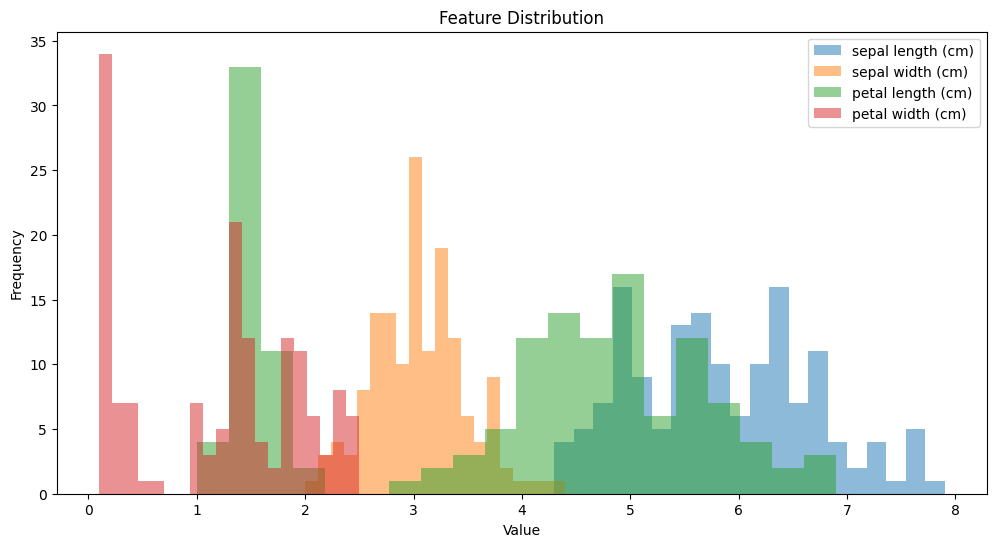

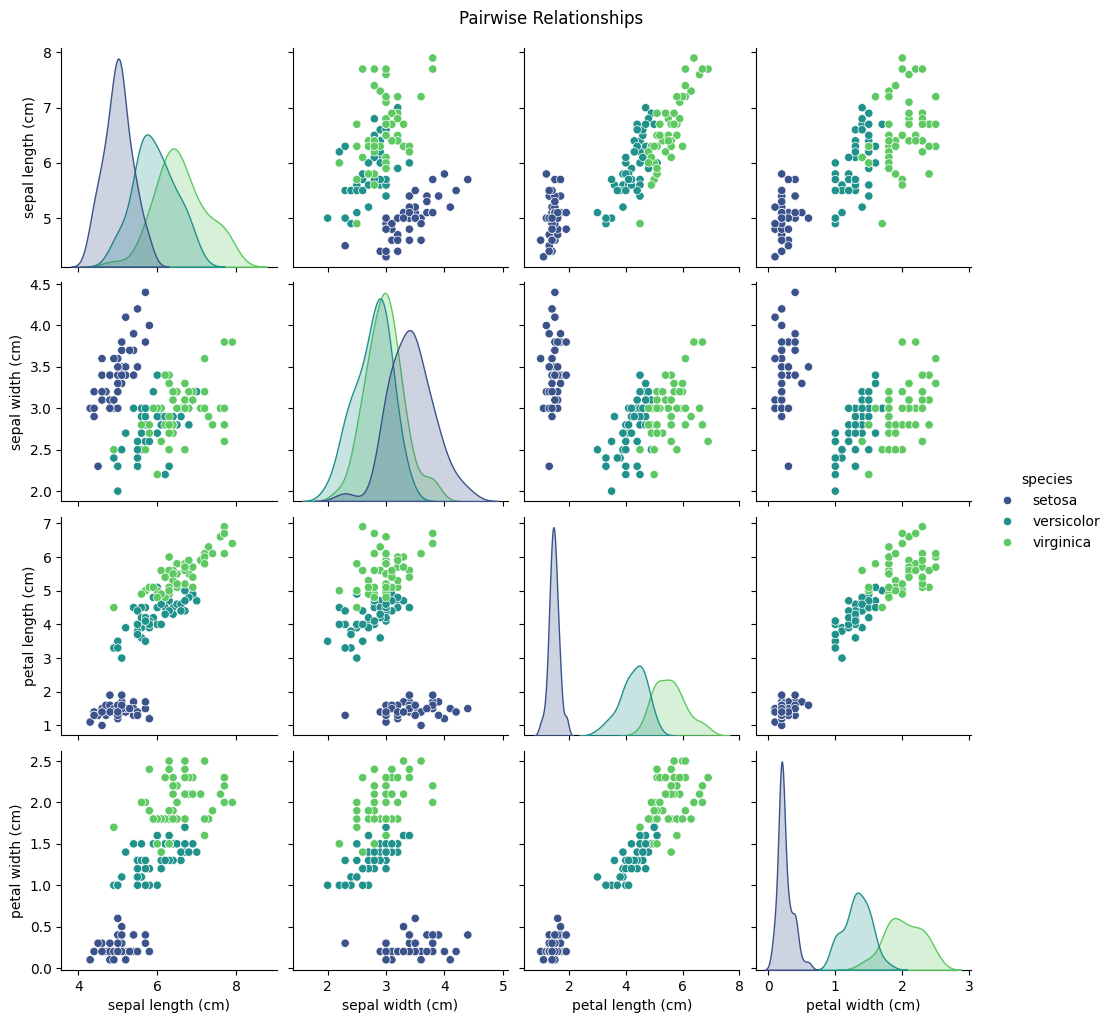

<ipython-input-4-9a779040722a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=data, palette='viridis')
<ipython-input-4-9a779040722a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=data, palette='viridis')
<ipython-input-4-9a779040722a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=feature, data=data, palette='viridis')
<ipython-input-4-9a779040722a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

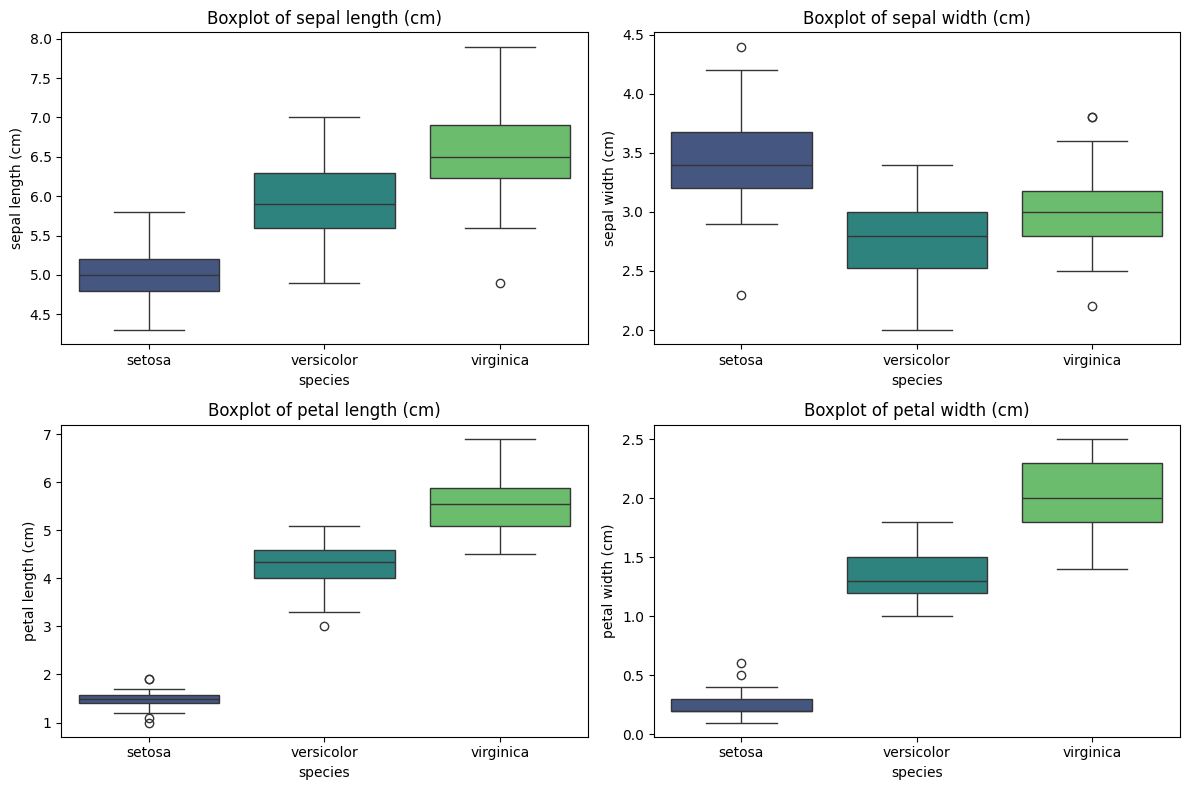

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({i: name for i, name in enumerate(iris.target_names)})

# Distribution of features
plt.figure(figsize=(12, 6))
for feature in iris.feature_names:
    plt.hist(data[feature], bins=20, alpha=0.5, label=feature)
plt.legend(loc='upper right')
plt.title('Feature Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Pairwise relationships
sns.pairplot(data, hue='species', palette='viridis')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

# Boxplot for feature distribution by species
plt.figure(figsize=(12, 8))
for feature in iris.feature_names:
    plt.subplot(2, 2, iris.feature_names.index(feature)+1)
    sns.boxplot(x='species', y=feature, data=data, palette='viridis')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()
